In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import import_ipynb
import VAR_model_with_neighbors_all as model_var


# Import Statsmodels
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse, aic

importing Jupyter notebook from VAR_model_with_neighbors_all.ipynb


In [2]:
#getting data

In [3]:
merged_pollutant_dataset_with_neighbors = pd.read_csv("merged_pollutant_dataset_with_neighbors.csv", index_col = 'date', parse_dates = ['date'])

In [4]:
merged_pollutant_dataset_with_neighbors

,state_code,county_code,state_name,county_name,co_polutant_level,no2_polutant_level,o3_polutant_level,pm10_polutant_level,pm25frm_polutant_level,pm25nfrm_polutant_level,...,neighbor5_pm25nfrm_polutant_level,neighbor5_so2_polutant_level,neighbor5_average_temp,neighbor5_max_temp,neighbor5_average_pressure,neighbor5_max_pressure,neighbor5_average_rh,neighbor5_max_rh,neighbor5_average_windspeed,neighbor5_max_windspeed
date,,,,,,,,,,,,,,,,,,,,,
2010-01-01,1,73,Alabama,Jefferson,0.5,NaN,0.027,10.0,NaN,7.4,...,NaN,1.8,28.645833,38.00,NaN,NaN,84.270833,98.000000,5.612500,7.950000
2010-01-01,4,13,Arizona,Maricopa,3.1,48.0,0.041,87.0,21.6,NaN,...,43.6,2.0,53.695833,67.20,982.69375,986.55,46.527778,65.111111,3.512963,5.988889
2010-01-01,4,19,Arizona,Pima,0.8,37.0,0.046,44.0,6.8,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-01,5,119,Arkansas,Pulaski,1.1,30.0,0.032,NaN,17.6,9.6,...,NaN,NaN,38.927083,50.75,NaN,NaN,25.125000,29.000000,3.411667,6.660000
2010-01-01,6,1,California,Alameda,0.7,32.0,0.021,NaN,22.1,NaN,...,NaN,NaN,53.666667,55.00,NaN,NaN,92.583333,100.000000,4.083333,6.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-05-17,49,49,Utah,Utah,0.2,30.0,0.053,15.0,13.6,NaN,...,NaN,1.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-05-17,50,7,Vermont,Chittenden,0.3,11.4,0.037,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-05-17,50,21,Vermont,Rutland,0.3,18.9,NaN,NaN,NaN,NaN,...,NaN,0.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
merged_pollutant_dataset_with_neighbors_sorted_pairs = merged_pollutant_dataset_with_neighbors.sort_values(by = ["state_code", \
                                                                                                                "county_code"])
# df.sort_values(by=['col1', 'col2'])

In [6]:
# merged_pollutant_dataset_with_neighbors_sorted_pairs = merged_pollutant_dataset_with_neighbors_sorted_pairs[merged_pollutant_dataset_with_neighbors_sorted_pairs.index < '2021-02-01']

In [7]:
merged_pollutant_dataset_with_neighbors_sorted_pairs

,state_code,county_code,state_name,county_name,co_polutant_level,no2_polutant_level,o3_polutant_level,pm10_polutant_level,pm25frm_polutant_level,pm25nfrm_polutant_level,...,neighbor5_pm25nfrm_polutant_level,neighbor5_so2_polutant_level,neighbor5_average_temp,neighbor5_max_temp,neighbor5_average_pressure,neighbor5_max_pressure,neighbor5_average_rh,neighbor5_max_rh,neighbor5_average_windspeed,neighbor5_max_windspeed
date,,,,,,,,,,,,,,,,,,,,,
2010-01-01,1,73,Alabama,Jefferson,0.5,NaN,0.027,10.0,NaN,7.4,...,NaN,1.8,28.645833,38.0,NaN,NaN,84.270833,98.0,5.612500,7.95
2010-01-02,1,73,Alabama,Jefferson,0.5,NaN,0.026,11.0,NaN,7.1,...,NaN,3.8,15.479167,20.0,NaN,NaN,71.041667,86.0,5.550000,8.35
2010-01-03,1,73,Alabama,Jefferson,0.5,NaN,0.022,8.0,NaN,8.1,...,NaN,5.3,11.937500,18.5,NaN,NaN,67.458333,83.0,4.395834,7.10
2010-01-04,1,73,Alabama,Jefferson,0.7,NaN,0.018,18.0,NaN,9.2,...,NaN,5.1,13.395834,17.5,NaN,NaN,77.166666,88.0,3.537500,7.00
2010-01-05,1,73,Alabama,Jefferson,0.7,NaN,0.011,35.0,NaN,9.4,...,NaN,8.7,14.458334,21.0,NaN,NaN,76.625000,86.5,3.041666,5.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-05-13,55,27,Wisconsin,Dodge,0.2,NaN,0.031,NaN,NaN,NaN,...,NaN,0.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-05-14,55,27,Wisconsin,Dodge,0.2,NaN,0.031,NaN,NaN,NaN,...,NaN,0.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-05-15,55,27,Wisconsin,Dodge,0.2,NaN,0.031,NaN,NaN,NaN,...,NaN,0.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
prediction_columns = ["co_polutant_level", "no2_polutant_level", "o3_polutant_level", "pm10_polutant_level",\
                     "pm25frm_polutant_level", "pm25nfrm_polutant_level","so2_polutant_level"]

In [9]:
models_all = {}

AlabamaJefferson
0


/Users/abhishekgawande/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
<string>:4: RuntimeWarning: divide by zero encountered in true_divide
<string>:7: RuntimeWarning: divide by zero encountered in true_divide


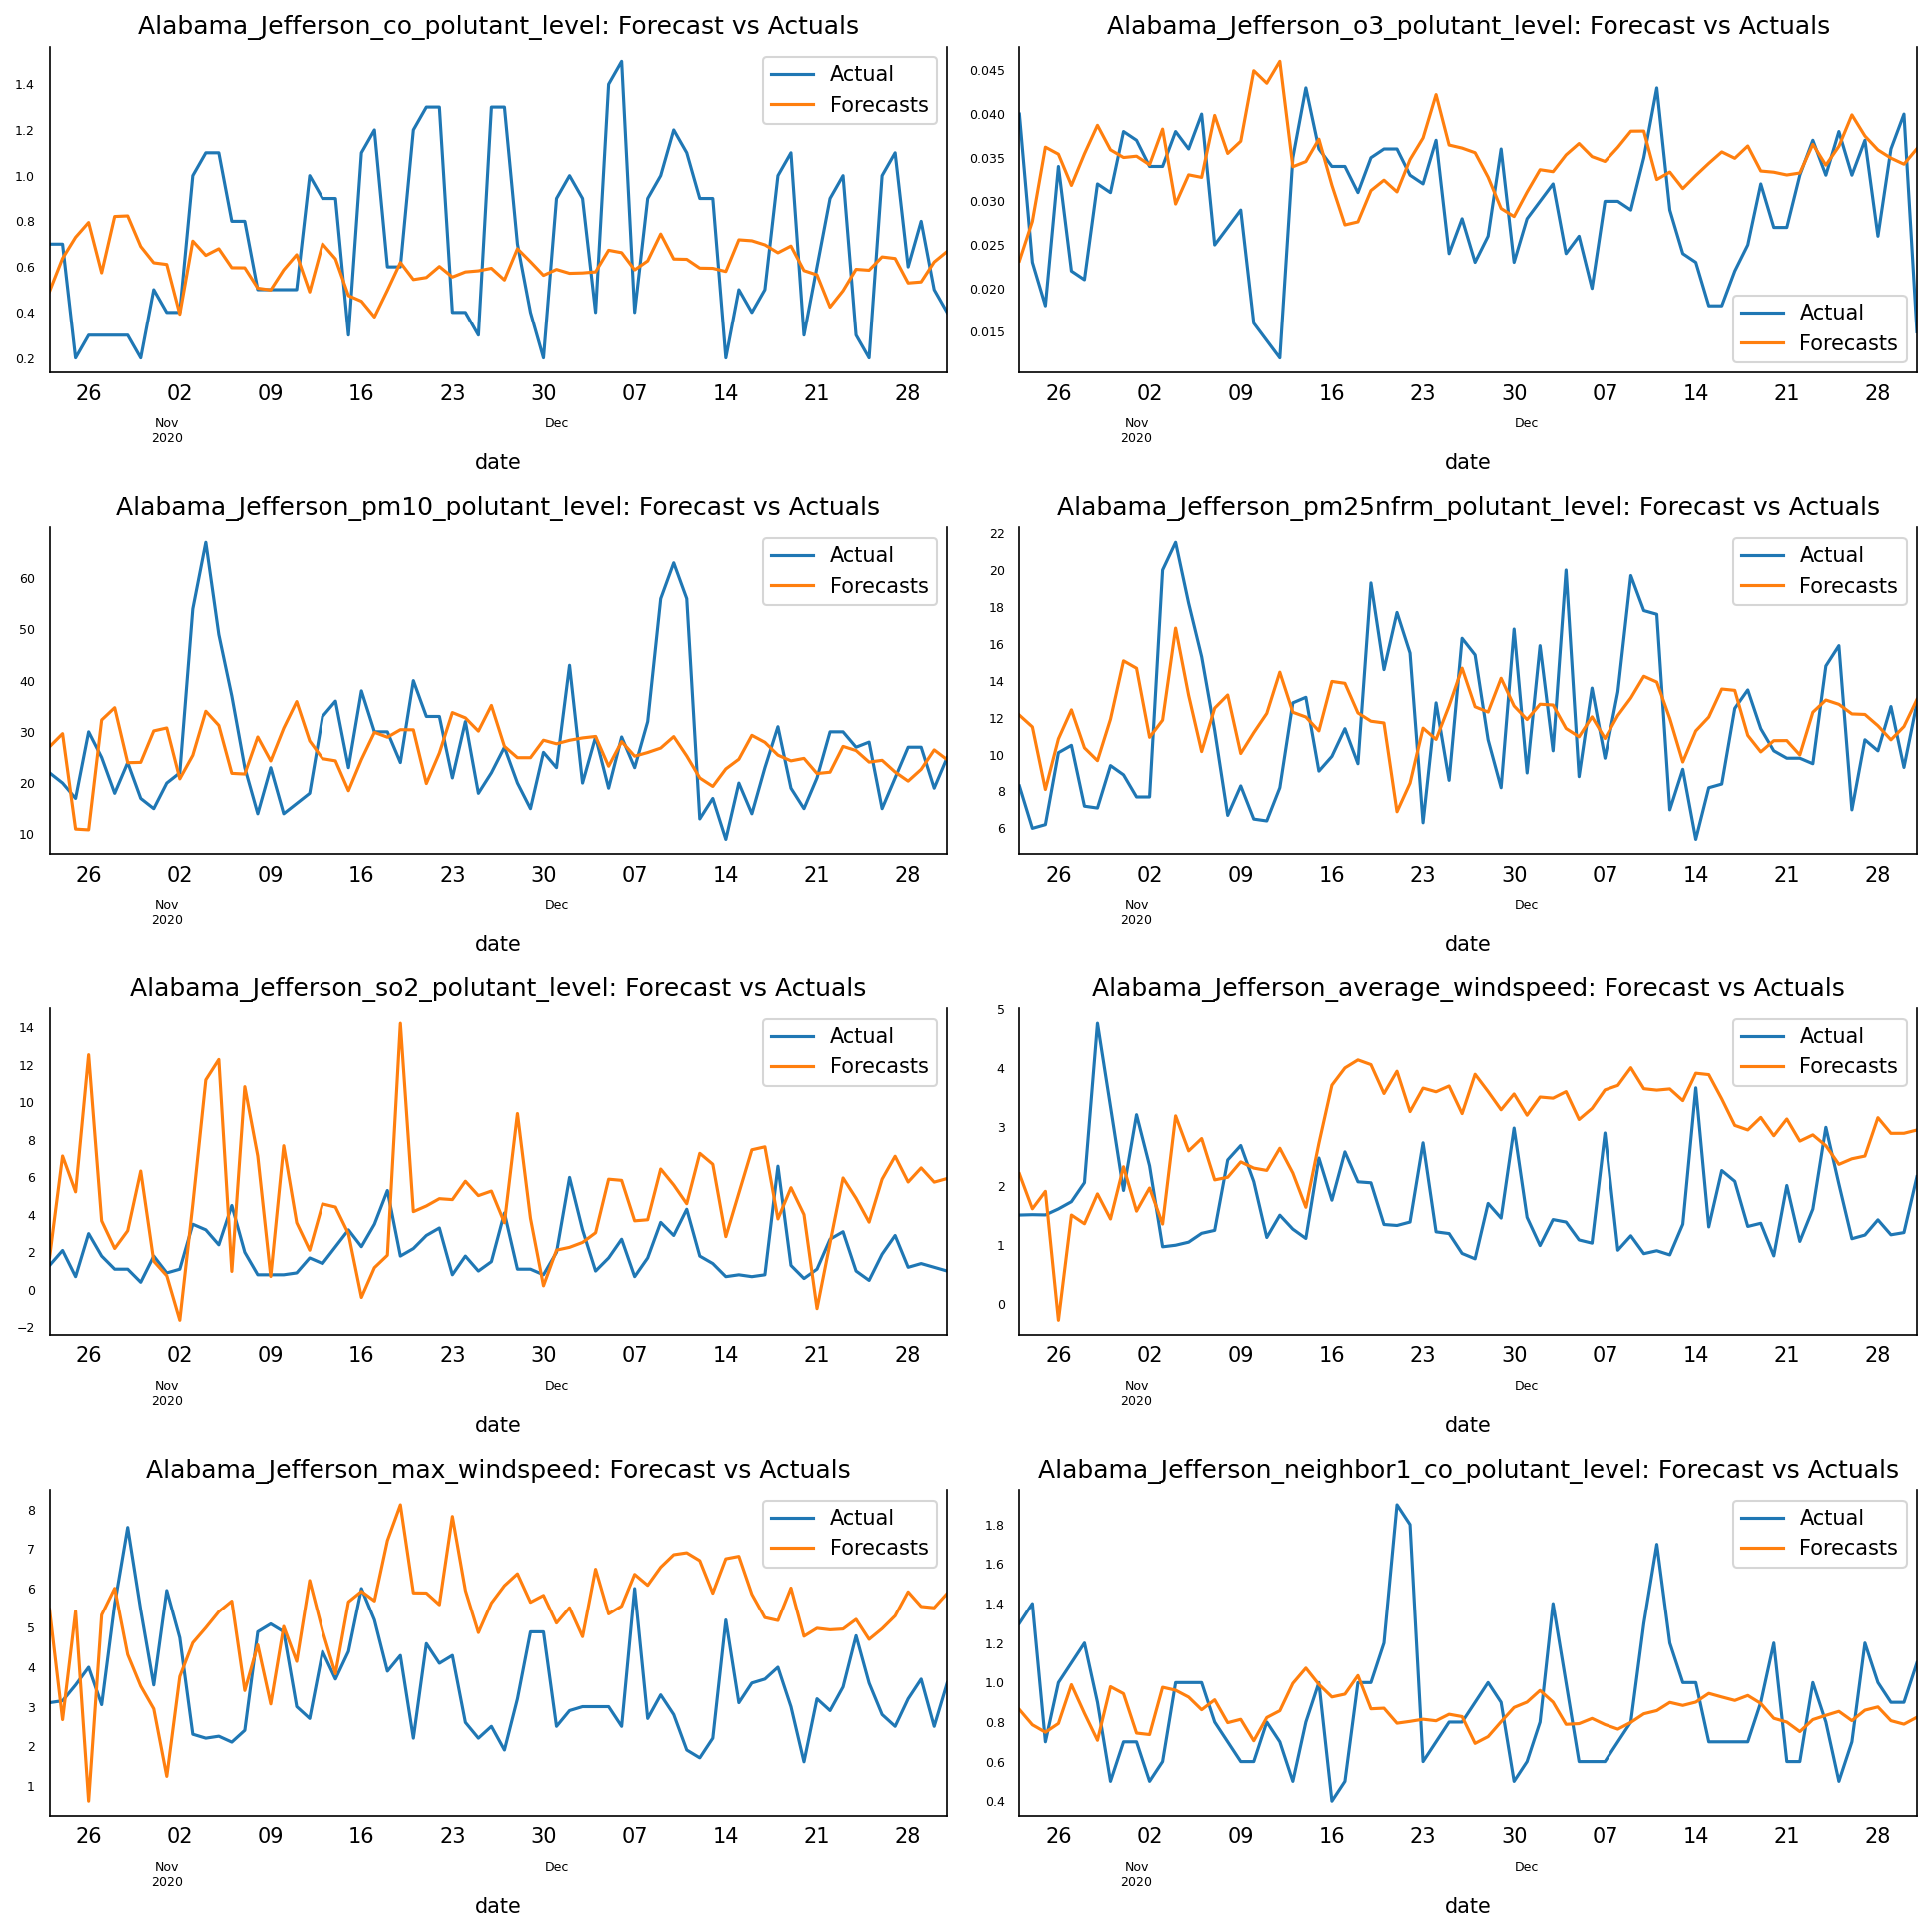

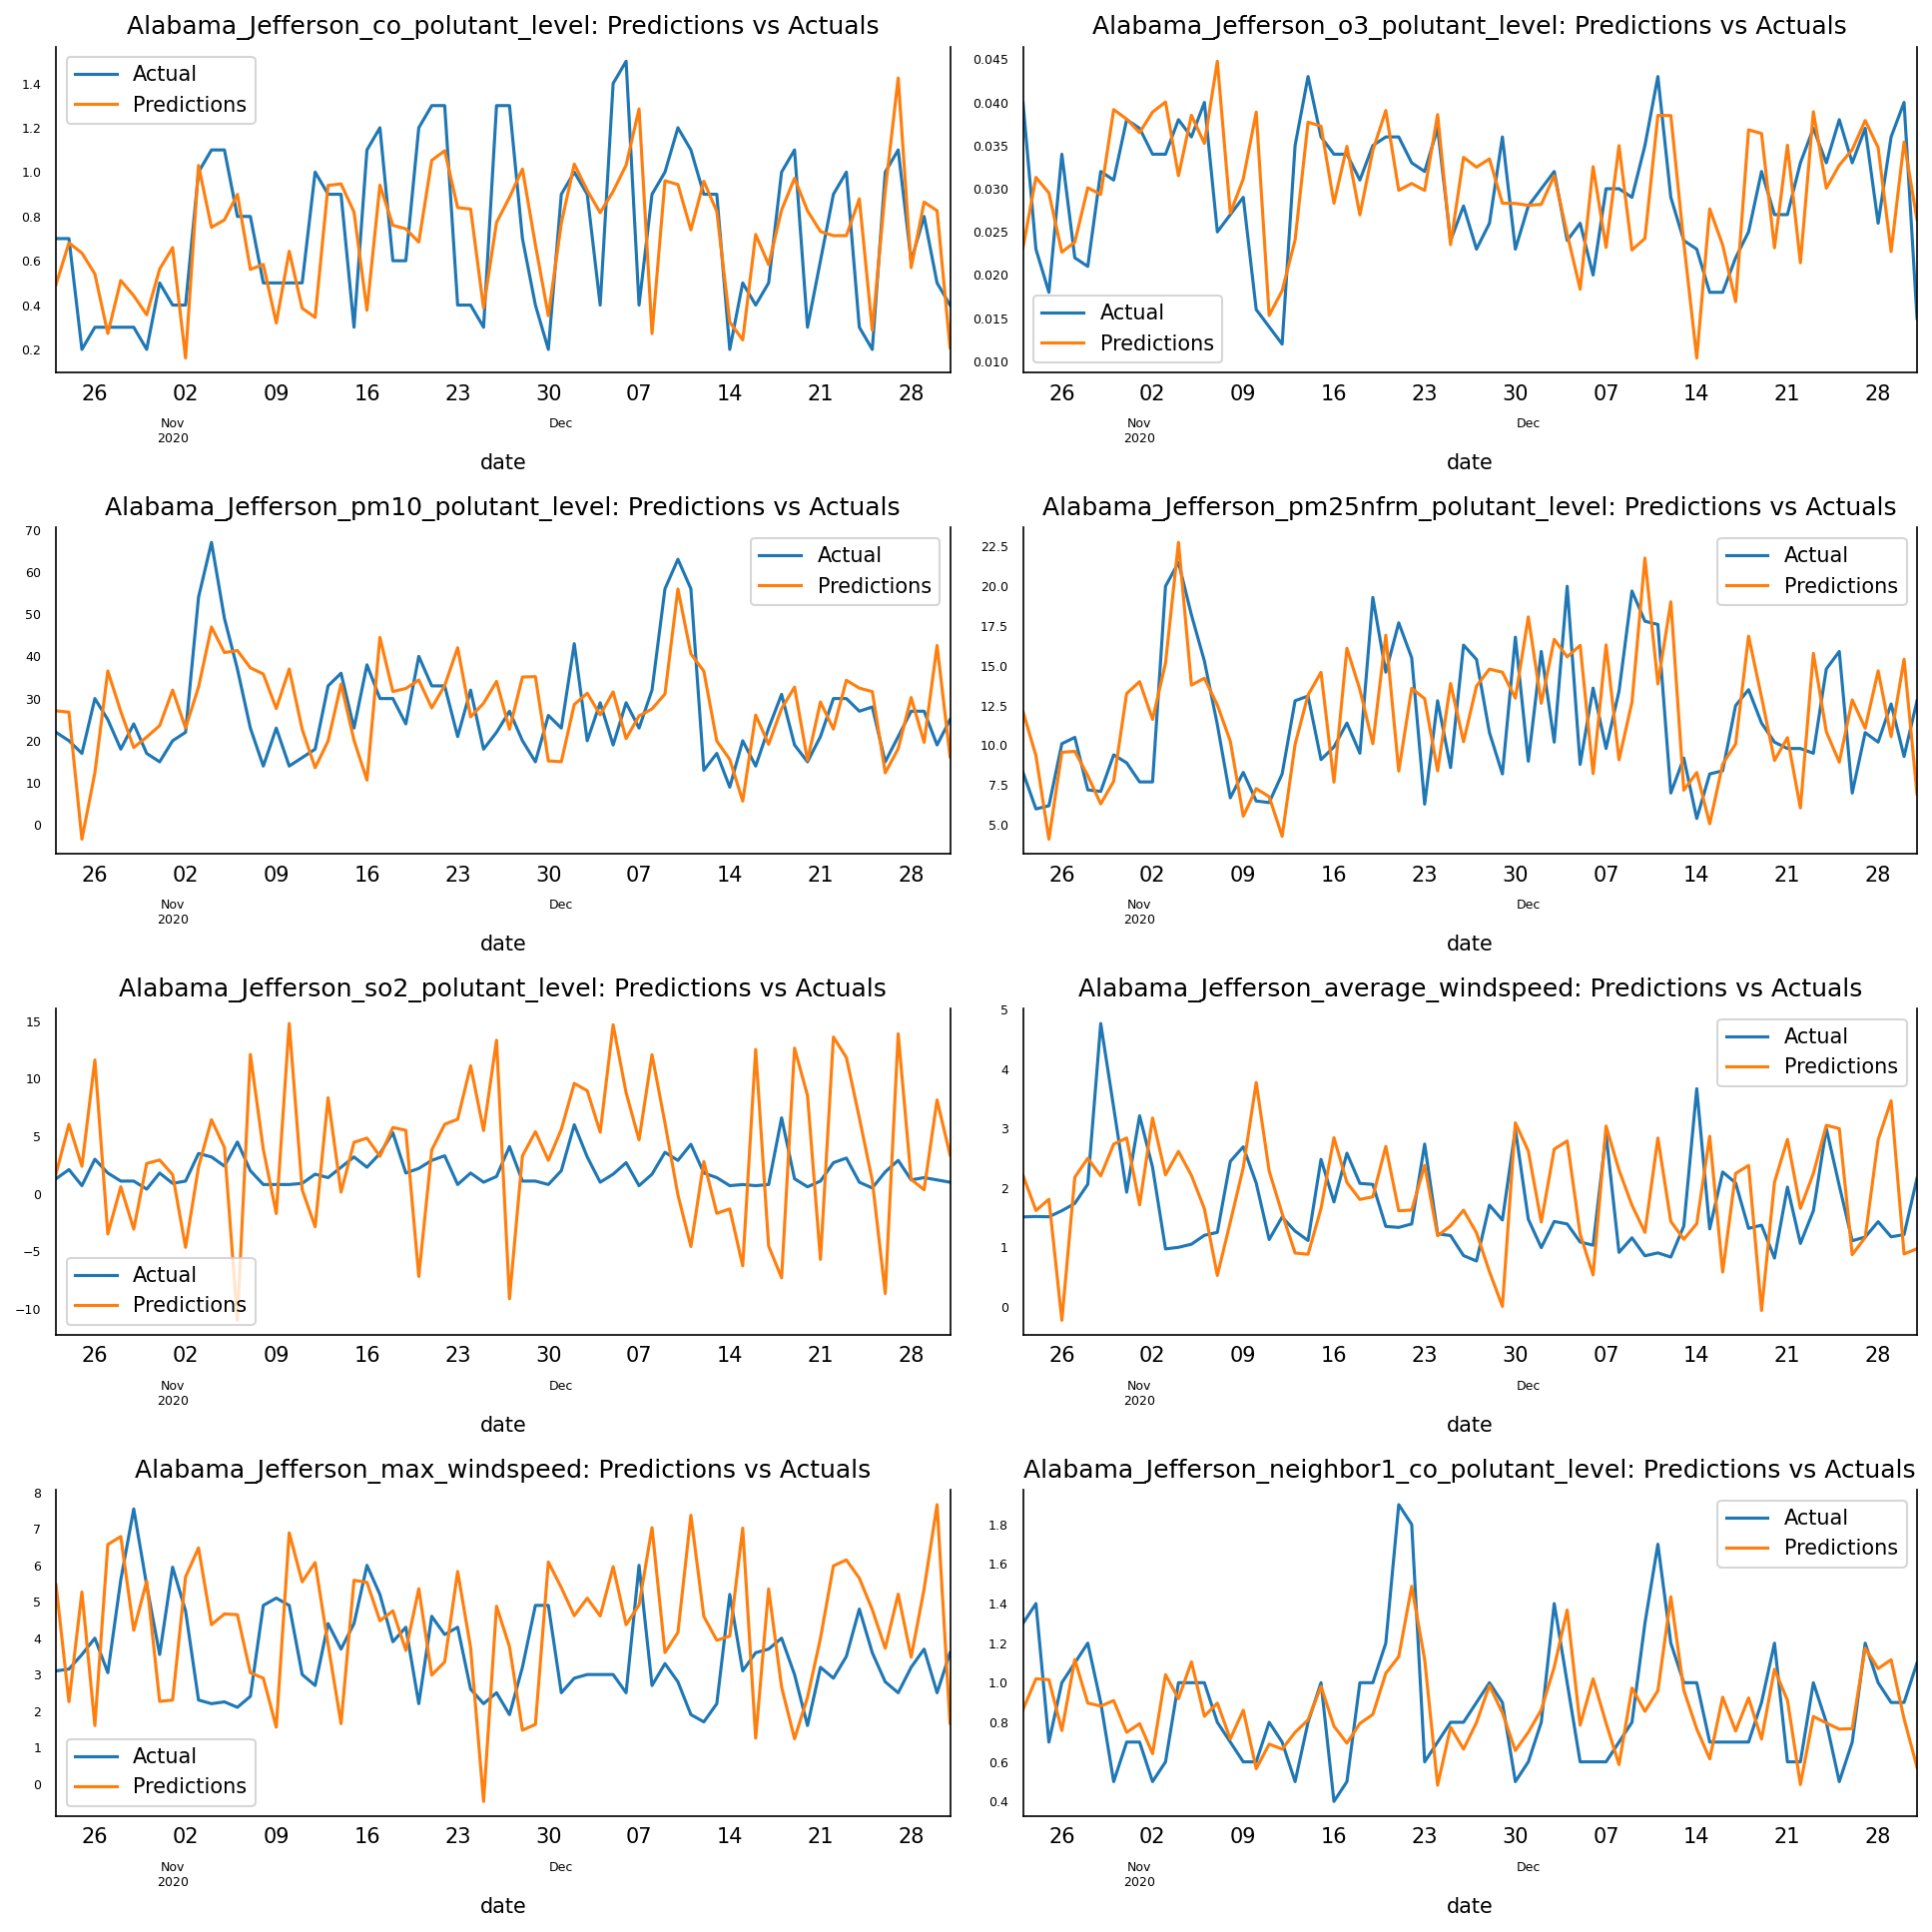

In [10]:
for i in range(100):
    
   
    # Getting data for one state_county pair
    if i == 0:
        state_county_df = model_var.get_data(merged_pollutant_dataset_with_neighbors_sorted_pairs,i)

        state_name = state_county_df["state_name"][0]
        county_name = state_county_df["county_name"][0]
        key = state_name+"_"+county_name

    if i == 0:
        print(state_name+county_name)
        print(i)

    # dropping columns ones with all null values
    # dropping columns with all same/equal values
    # dropping columns with date types
        state_county_df_reduced = model_var.data_cleaning(state_county_df)

    # Interpolation for missing values # check it further
        state_county_df_reduced_interpolated = model_var.interpolation(state_county_df_reduced, interpolation_method = 'time')


    # Selecting columns with all non-null values after interpolation 
        state_county_non_null_df = model_var.get_all_non_null_columns(state_county_df_reduced_interpolated)

#         display(state_county_non_null_df.iloc[:,12:])

    # List of dropped columns
        cols_dropped = set(list(state_county_df.columns)) ^ set(list(state_county_non_null_df.columns))

    # Checking if times series are stationary 
#     Model_var.check_stationary(state_county_non_null_df)


    # non-null DF plots
#     model_var.non_null_data_plots(state_county_non_null_df)

    #--------------#--------------#--------------
    # To do: Scaling, Standardisation, Feature normalisation can be done as well
    #--------------#--------------#--------------
    
    
        prediction_columns_model = [value for value in prediction_columns if value in set(list(state_county_non_null_df.columns))]
    
    # Training the Model
    # Splitting dataset into training and test
        train, test, split_time = model_var.split_data(state_county_non_null_df, split_ratio = 0.05)
    

    # Training the VAR model
        model = model_var.model_train(train)


#     testing for the best lag value

#     try:
#         optimum_lag = model_var.best_lag(model)
#     except:
#         # going with last 1 week data in case we don't find the optimum lag

#         optimum_lag = 21
#         print("i:",i,"optimum_lag:", optimum_lag)

    if i in {63,64,65,67,70,71,84,85}:
        optimum_lag = 21
    else:
        optimum_lag = 45

    #Fitting the model with the best lag value 
    if i == 0:
        results = model_var.model_fit(model,optimum_lag) 


    #getting long-term forecasts using the model
    if i == 0:
        results = model_var.model_fit(model,optimum_lag) 
        long_term_forecasts_df = model_var.long_term_forecast(results,train,test,split_time)

    # getting plots of actual test data vs forecasts
        model_var.forecasts_vs_actual_plot(long_term_forecasts_df, test,key)

    #long-term model forecast evaluations
        evaluations_forecasts_test = model_var.evaluation_metric(long_term_forecasts_df.iloc[:70], test.iloc[:70])


    # Checking how VAR estimates the training data
        estimations_df = model_var.var_training_data_performace(train, results)


    # getting plots of actual training data vs training estimates
#     model_var.estimates_vs_actual_plot(estimations_df,train, test,optimum_lag,key) 


    # training data estimates evaluation(how the model performs on training data)
        evaluations_estimates_train = model_var.evaluation_metric(estimations_df, train.iloc[optimum_lag:])


    # Checking how VAR predicts the test data(one day at a time)
        predictions_df = model_var.var_test_data_performance_one_day_at_a_time(state_county_non_null_df,results,test,split_time)


    # getting plots of actual test data vs forecast_of test_data_one_day_at_a_time
        model_var.test_prediction_vs_actual_plot(predictions_df,test, key)


    # Test data predictions evaluation(how the model performs on test data wwith short term forecasting)
        evaluations_predictions_test = model_var.evaluation_metric(predictions_df.iloc[:70], test.iloc[:70])




        models_all[key] = {"results": results, "input_shape_columns": list(state_county_non_null_df.columns),\
                             "input_shape_lag": optimum_lag, "evaluations_long_term_forecasting": evaluations_forecasts_test,\
                          "evaluations_training_data": evaluations_estimates_train, \
                           "evaluations_short_term_forecasting":evaluations_predictions_test,
                           "dropped_columns": cols_dropped,
                           "prediction_columns": prediction_columns_model,
                           "i": i
                          }



In [11]:
# models_all["Alabama_Jefferson"]

In [23]:
# len(models_all.values())

In [13]:
prediction_columns_all = ["date","state_code","county_code","state_name","county_name","co_polutant_level", "no2_polutant_level", "o3_polutant_level", "pm10_polutant_level",\
                     "pm25frm_polutant_level", "pm25nfrm_polutant_level","so2_polutant_level"]

In [14]:
# models_all

In [15]:
# count = 0
# for key,value in models_all.items():
#     print("")
#     print(key)
#     print(count)
#     print(value["evaluations_short_term_forecasting"])
#     count += 1

In [16]:
def get_long_term_forecasts(starting_date, time_period):
    
    long_term_forecats_df = pd.DataFrame(columns = prediction_columns_all)
    
    for i in range(100):

#         starting_date = "2021-01-01"
#         time_period = 365
        starting_date = starting_date
        time_period = time_period

#         # Getting data for one state_county pair
#         pair_number =  models_all[key]["results"]
        state_county_df = model_var.get_data(merged_pollutant_dataset_with_neighbors_sorted_pairs,i)

        state_code = state_county_df["state_code"][0]
        county_code = state_county_df["county_code"][0]

        state_name = state_county_df["state_name"][0]
        county_name = state_county_df["county_name"][0]
        key = state_name+"_"+county_name
        input_columns = models_all[key]["input_shape_columns"]
        state_county_df_reduced = state_county_df[input_columns]
        state_county_df_reduced_interpolated = model_var.interpolation(state_county_df_reduced, interpolation_method = 'time')
        input_data = state_county_df_reduced_interpolated[state_county_df_reduced_interpolated.index < starting_date]

    #     getting forecasts
        results = models_all[key]["results"]
        lag = results.k_ar
        forecasts = results.forecast(input_data.values[-lag:], steps = time_period)
        forecasts_df = pd.DataFrame(forecasts, columns = list(input_columns))

        df = pd.DataFrame(columns = prediction_columns_all)

    #     dates = pd.Series(pd.date_range("2021", freq="D", periods=time_period))

        dates = pd.Series(pd.period_range(starting_date, freq="D", periods=time_period))
    #     display(dates)
    #     display(forecasts_df)

        for column in list(long_term_forecats_df.columns):
            if column in set(input_columns):
                df[column] = forecasts_df[column]

        df["state_name"] = state_name
        df["county_name"] = county_name
        df["state_code"] = state_code
        df["county_code"] = county_code
        df["date"] = dates

    # #     display(df)
        long_term_forecats_df = long_term_forecats_df.append(df)
    #     display(forecasts_2021_df)
    
    return long_term_forecats_df



In [17]:
models_all["Alabama_Jefferson"]['evaluations_long_term_forecasting']

,mape,me,mae,mpe,rmse
co_polutant_level,0.585719,-0.115251,0.333208,0.166953,0.394538
o3_polutant_level,0.353460,0.004975,0.007844,0.278234,0.010455
pm10_polutant_level,0.375054,-0.538636,9.130423,0.140871,12.184144
pm25nfrm_polutant_level,0.338450,0.501134,3.425570,0.165944,4.110248
so2_polutant_level,2.780681,2.775465,3.521792,2.484135,4.358039
average_windspeed,1.176904,1.213917,1.514540,1.067889,1.732231
max_windspeed,0.792649,1.761747,2.269712,0.694589,2.599155
neighbor1_co_polutant_level,0.291277,-0.025857,0.241781,0.083024,0.321976


In [18]:
evaluations_long_term_forecasting_df = models_all["Alabama_Jefferson"]['evaluations_long_term_forecasting']
evaluations_training_data_df = models_all["Alabama_Jefferson"]['evaluations_training_data']
evaluations_short_term_forecasting_df =  models_all["Alabama_Jefferson"]['evaluations_short_term_forecasting']

In [19]:
# evaluations_long_term_forecasting_df

In [20]:
for key,value in models_all.items():
    if key != "Alabama_Jefferson":
    
#         display(value['evaluations_long_term_forecasting'])

        evaluations_long_term_forecasting_df = pd.concat([evaluations_long_term_forecasting_df,value['evaluations_long_term_forecasting']], axis = 1)
        evaluations_training_data_df = pd.concat([evaluations_training_data_df,value['evaluations_training_data']], axis = 1)
        evaluations_short_term_forecasting_df = pd.concat([evaluations_short_term_forecasting_df,value['evaluations_short_term_forecasting']], axis = 1)

    

In [21]:
prediction_columns = ['co_polutant_level',\
 'no2_polutant_level',\
 'o3_polutant_level',\
 'pm10_polutant_level',\
 'pm25frm_polutant_level',\
 'pm25nfrm_polutant_level',\
 'so2_polutant_level']

len(prediction_columns)

7